# Dataset

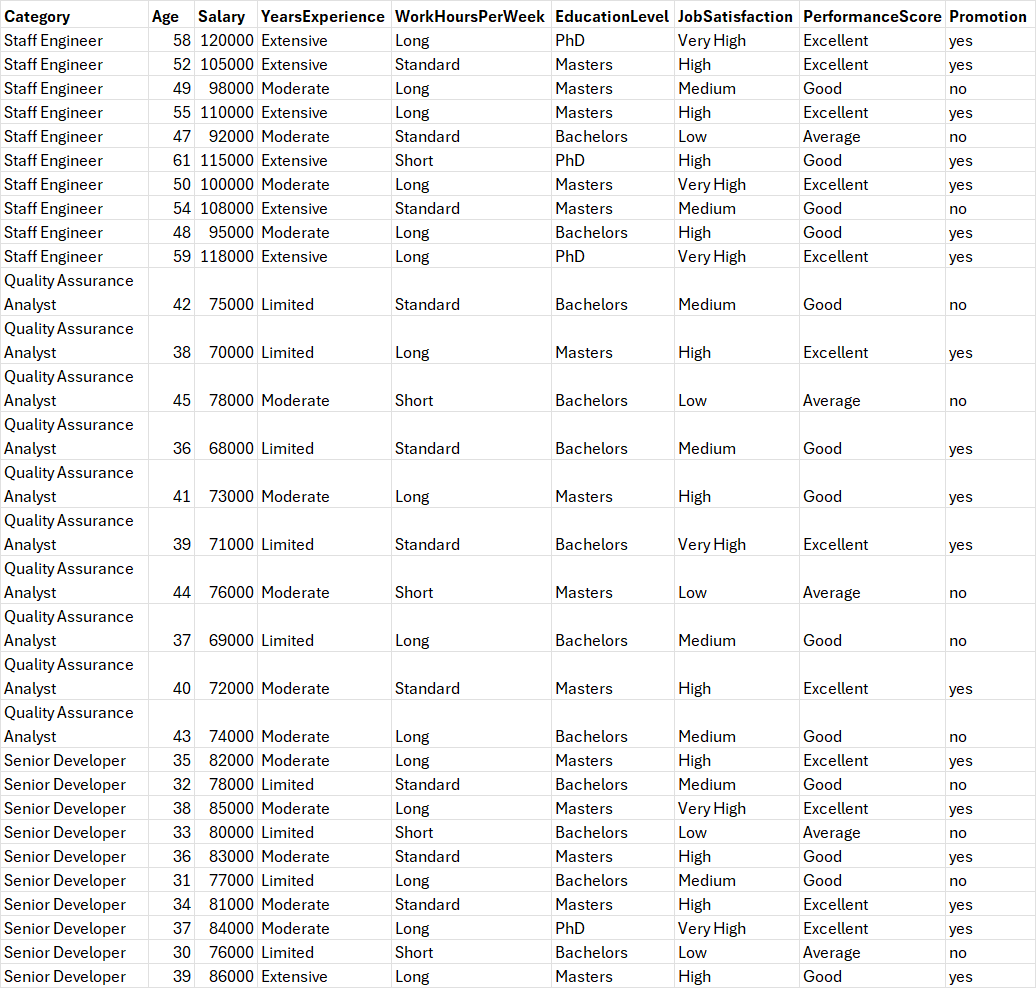

# Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 1. Load and understand the dataset

In [ ]:
df = pd.read_csv('data.csv')

df

,Category,Age,Salary,YearsExperience,WorkHoursPerWeek,EducationLevel,JobSatisfaction,PerformanceScore,Promotion
0,Staff Engineer,58,120000,Extensive,Long,PhD,Very High,Excellent,yes
1,Staff Engineer,52,105000,Extensive,Standard,Masters,High,Excellent,yes
2,Staff Engineer,49,98000,Moderate,Long,Masters,Medium,Good,no
3,Staff Engineer,55,110000,Extensive,Long,Masters,High,Excellent,yes
4,Staff Engineer,47,92000,Moderate,Standard,Bachelors,Low,Average,no
5,Staff Engineer,61,115000,Extensive,Short,PhD,High,Good,yes
6,Staff Engineer,50,100000,Moderate,Long,Masters,Very High,Excellent,yes
7,Staff Engineer,54,108000,Extensive,Standard,Masters,Medium,Good,no
8,Staff Engineer,48,95000,Moderate,Long,Bachelors,High,Good,yes
9,Staff Engineer,59,118000,Extensive,Long,PhD,Very High,Excellent,yes


### Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          30 non-null     object
 1   Age               30 non-null     int64 
 2   Salary            30 non-null     int64 
 3   YearsExperience   30 non-null     object
 4   WorkHoursPerWeek  30 non-null     object
 5   EducationLevel    30 non-null     object
 6   JobSatisfaction   30 non-null     object
 7   PerformanceScore  30 non-null     object
 8   Promotion         30 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.2+ KB


### Descriptive analysis of the dataset

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,30.0,42.766667,8.759953,30.0,36.25,40.5,48.75,61.0
Salary,30.0,86633.333333,15659.046814,68000.0,75250.00,81500.0,97250.00,120000.0


# 2. Apply Data Manipulation Operations

### (i) Inserting a new sample

In [ ]:
print("Before inserting the new sample:\n")
print(df["Category"].value_counts())

Before inserting the new sample:

Category
Staff Engineer               10
Quality Assurance Analyst    10
Senior Developer             10
Name: count, dtype: int64


In [ ]:
# Creating the new sample
new_row = {
    'Category': 'Staff Engineer',
    'Age': 34,
    'Salary': 95000,
    'YearsExperience': 'Moderate',
    'WorkHoursPerWeek': 'Standard',
    'EducationLevel': 'Masters',
    'JobSatisfaction': 'High',
    'PerformanceScore': 'Good',
    'Promotion': 'yes'
}

In [ ]:
# Appending the new row into the dataset
df = pd.concat(
    [df, pd.DataFrame([new_row])],
    ignore_index=True
)

df

,Category,Age,Salary,YearsExperience,WorkHoursPerWeek,EducationLevel,JobSatisfaction,PerformanceScore,Promotion
0,Staff Engineer,58,120000,Extensive,Long,PhD,Very High,Excellent,yes
1,Staff Engineer,52,105000,Extensive,Standard,Masters,High,Excellent,yes
2,Staff Engineer,49,98000,Moderate,Long,Masters,Medium,Good,no
3,Staff Engineer,55,110000,Extensive,Long,Masters,High,Excellent,yes
4,Staff Engineer,47,92000,Moderate,Standard,Bachelors,Low,Average,no
5,Staff Engineer,61,115000,Extensive,Short,PhD,High,Good,yes
6,Staff Engineer,50,100000,Moderate,Long,Masters,Very High,Excellent,yes
7,Staff Engineer,54,108000,Extensive,Standard,Masters,Medium,Good,no
8,Staff Engineer,48,95000,Moderate,Long,Bachelors,High,Good,yes
9,Staff Engineer,59,118000,Extensive,Long,PhD,Very High,Excellent,yes


In [ ]:
print("After inserting the new sample:\n")
print(df["Category"].value_counts())

After inserting the new sample:

Category
Staff Engineer               11
Quality Assurance Analyst    10
Senior Developer             10
Name: count, dtype: int64


### (ii) Deleting a particular sample

In [ ]:
# Deleting the sample in row index 10
df = df.drop(index=10)
df = df.reset_index(drop=True)

df

,Category,Age,Salary,YearsExperience,WorkHoursPerWeek,EducationLevel,JobSatisfaction,PerformanceScore,Promotion
0,Staff Engineer,58,120000,Extensive,Long,PhD,Very High,Excellent,yes
1,Staff Engineer,52,105000,Extensive,Standard,Masters,High,Excellent,yes
2,Staff Engineer,49,98000,Moderate,Long,Masters,Medium,Good,no
3,Staff Engineer,55,110000,Extensive,Long,Masters,High,Excellent,yes
4,Staff Engineer,47,92000,Moderate,Standard,Bachelors,Low,Average,no
5,Staff Engineer,61,115000,Extensive,Short,PhD,High,Good,yes
6,Staff Engineer,50,100000,Moderate,Long,Masters,Very High,Excellent,yes
7,Staff Engineer,54,108000,Extensive,Standard,Masters,Medium,Good,no
8,Staff Engineer,48,95000,Moderate,Long,Bachelors,High,Good,yes
9,Staff Engineer,59,118000,Extensive,Long,PhD,Very High,Excellent,yes


### (iii) Updating a particular sample

In [ ]:
# Updating the EducationLevel to NAN if the PerformanceScore is greater than 90
df.loc[(df["Salary"] > 90000) & (df["WorkHoursPerWeek"] == "Long") & (df["JobSatisfaction"] == "Medium"), "PerformanceScore"] = np.nan

df

,Category,Age,Salary,YearsExperience,WorkHoursPerWeek,EducationLevel,JobSatisfaction,PerformanceScore,Promotion
0,Staff Engineer,58,120000,Extensive,Long,PhD,Very High,Excellent,yes
1,Staff Engineer,52,105000,Extensive,Standard,Masters,High,Excellent,yes
2,Staff Engineer,49,98000,Moderate,Long,Masters,Medium,NaN,no
3,Staff Engineer,55,110000,Extensive,Long,Masters,High,Excellent,yes
4,Staff Engineer,47,92000,Moderate,Standard,Bachelors,Low,Average,no
5,Staff Engineer,61,115000,Extensive,Short,PhD,High,Good,yes
6,Staff Engineer,50,100000,Moderate,Long,Masters,Very High,Excellent,yes
7,Staff Engineer,54,108000,Extensive,Standard,Masters,Medium,Good,no
8,Staff Engineer,48,95000,Moderate,Long,Bachelors,High,Good,yes
9,Staff Engineer,59,118000,Extensive,Long,PhD,Very High,Excellent,yes


# 3. Applying data preprocessing

### (i) Find number of missing values

In [ ]:
print(f"Total number of NaN values = {df.isnull().sum().sum()}")

Total number of NaN values = 1


In [ ]:
print("Column-wise NaN values:\n")
df.isnull().sum()

Column-wise NaN values:



,0
Category,0
Age,0
Salary,0
YearsExperience,0
WorkHoursPerWeek,0
EducationLevel,0
JobSatisfaction,0
PerformanceScore,1
Promotion,0


### (ii) Replace missing values with mean/median/mode

In [ ]:
df["PerformanceScore"].fillna(df["PerformanceScore"].mode()[0], inplace=True)

df

,Category,Age,Salary,YearsExperience,WorkHoursPerWeek,EducationLevel,JobSatisfaction,PerformanceScore,Promotion
0,Staff Engineer,58,120000,Extensive,Long,PhD,Very High,Excellent,yes
1,Staff Engineer,52,105000,Extensive,Standard,Masters,High,Excellent,yes
2,Staff Engineer,49,98000,Moderate,Long,Masters,Medium,Excellent,no
3,Staff Engineer,55,110000,Extensive,Long,Masters,High,Excellent,yes
4,Staff Engineer,47,92000,Moderate,Standard,Bachelors,Low,Average,no
5,Staff Engineer,61,115000,Extensive,Short,PhD,High,Good,yes
6,Staff Engineer,50,100000,Moderate,Long,Masters,Very High,Excellent,yes
7,Staff Engineer,54,108000,Extensive,Standard,Masters,Medium,Good,no
8,Staff Engineer,48,95000,Moderate,Long,Bachelors,High,Good,yes
9,Staff Engineer,59,118000,Extensive,Long,PhD,Very High,Excellent,yes


In [ ]:
# Checking if missing values have been replaced
df.isnull().sum()

,0
Category,0
Age,0
Salary,0
YearsExperience,0
WorkHoursPerWeek,0
EducationLevel,0
JobSatisfaction,0
PerformanceScore,0
Promotion,0


### (iii) Applying encoding

In [ ]:
# Dependent column
y = df.iloc[:, -1]

y

,Promotion
0,yes
1,yes
2,no
3,yes
4,no
5,yes
6,yes
7,no
8,yes
9,yes


In [ ]:
# Independent columns
x = df.iloc[:, :-1]

x

,Category,Age,Salary,YearsExperience,WorkHoursPerWeek,EducationLevel,JobSatisfaction,PerformanceScore
0,Staff Engineer,58,120000,Extensive,Long,PhD,Very High,Excellent
1,Staff Engineer,52,105000,Extensive,Standard,Masters,High,Excellent
2,Staff Engineer,49,98000,Moderate,Long,Masters,Medium,Excellent
3,Staff Engineer,55,110000,Extensive,Long,Masters,High,Excellent
4,Staff Engineer,47,92000,Moderate,Standard,Bachelors,Low,Average
5,Staff Engineer,61,115000,Extensive,Short,PhD,High,Good
6,Staff Engineer,50,100000,Moderate,Long,Masters,Very High,Excellent
7,Staff Engineer,54,108000,Extensive,Standard,Masters,Medium,Good
8,Staff Engineer,48,95000,Moderate,Long,Bachelors,High,Good
9,Staff Engineer,59,118000,Extensive,Long,PhD,Very High,Excellent


In [ ]:
# Encoding the independent columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(x))

X

array([[0.0, 0.0, 1.0, 58, 120000, 'Extensive', 'Long', 'PhD',
        'Very High', 'Excellent'],
       [0.0, 0.0, 1.0, 52, 105000, 'Extensive', 'Standard', 'Masters',
        'High', 'Excellent'],
       [0.0, 0.0, 1.0, 49, 98000, 'Moderate', 'Long', 'Masters',
        'Medium', 'Excellent'],
       [0.0, 0.0, 1.0, 55, 110000, 'Extensive', 'Long', 'Masters',
        'High', 'Excellent'],
       [0.0, 0.0, 1.0, 47, 92000, 'Moderate', 'Standard', 'Bachelors',
        'Low', 'Average'],
       [0.0, 0.0, 1.0, 61, 115000, 'Extensive', 'Short', 'PhD', 'High',
        'Good'],
       [0.0, 0.0, 1.0, 50, 100000, 'Moderate', 'Long', 'Masters',
        'Very High', 'Excellent'],
       [0.0, 0.0, 1.0, 54, 108000, 'Extensive', 'Standard', 'Masters',
        'Medium', 'Good'],
       [0.0, 0.0, 1.0, 48, 95000, 'Moderate', 'Long', 'Bachelors',
        'High', 'Good'],
       [0.0, 0.0, 1.0, 59, 118000, 'Extensive', 'Long', 'PhD',
        'Very High', 'Excellent'],
       [1.0, 0.0, 0.0, 38, 7000

In [ ]:
# Encoding the dependent column
le = LabelEncoder()
Y = le.fit_transform(y)

Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1])

# 4. Implement Find-S and Candidate elimination algorithm

In [ ]:
x_rows = x.shape[0]
x_cols = x.shape[1]

### (i) Find-S algorithm

In [ ]:
x = df.drop('Promotion', axis=1)
y = df['Promotion']

In [ ]:
def find_s(hypothesis, x, y):
    for i in range(len(x)):
        if y.iloc[i] == 'yes':  # class = Yes
            for j in range(len(x.columns)):
                if hypothesis[j] == '0':
                    hypothesis[j] = x.iloc[i, j]
                elif hypothesis[j] != x.iloc[i, j]:
                    hypothesis[j] = '?'
            print(f"H.{i}   =>   {hypothesis}")
        else:  # class = No
            print(f"H.{i}   =>   H.{i - 1}")
    return hypothesis

In [ ]:
x_cols = len(x.columns)
h = ['0'] * x_cols
print(f"Initial Hypothesis => {h}\n")
h = find_s(h, x, y)
print(f"\nFinal Hypothesis => {h}")

Initial Hypothesis => ['0', '0', '0', '0', '0', '0', '0', '0']

H.0   =>   ['Staff Engineer', 58, 120000, 'Extensive', 'Long', 'PhD', 'Very High', 'Excellent']
H.1   =>   ['Staff Engineer', '?', '?', 'Extensive', '?', '?', '?', 'Excellent']
H.2   =>   H.1
H.3   =>   ['Staff Engineer', '?', '?', 'Extensive', '?', '?', '?', 'Excellent']
H.4   =>   H.3
H.5   =>   ['Staff Engineer', '?', '?', 'Extensive', '?', '?', '?', '?']
H.6   =>   ['Staff Engineer', '?', '?', '?', '?', '?', '?', '?']
H.7   =>   H.6
H.8   =>   ['Staff Engineer', '?', '?', '?', '?', '?', '?', '?']
H.9   =>   ['Staff Engineer', '?', '?', '?', '?', '?', '?', '?']
H.10   =>   ['?', '?', '?', '?', '?', '?', '?', '?']
H.11   =>   H.10
H.12   =>   ['?', '?', '?', '?', '?', '?', '?', '?']
H.13   =>   ['?', '?', '?', '?', '?', '?', '?', '?']
H.14   =>   ['?', '?', '?', '?', '?', '?', '?', '?']
H.15   =>   H.14
H.16   =>   H.15
H.17   =>   ['?', '?', '?', '?', '?', '?', '?', '?']
H.18   =>   H.17
H.19   =>   ['?', '?', '?', '?',

### (ii) Candidate elimination algorithm

In [ ]:
encoded_data = pd.get_dummies(df.drop(columns=['Promotion']), drop_first=True)
encoded_labels = df['Promotion'].apply(lambda x: 1 if x == 'yes' else 0).values
encoded_dataset = encoded_data.values

In [ ]:
# Function to get attribute domains
def get_attribute_domains(dataset):
    domains = []
    for i in range(dataset.shape[1]):
        domain = set()
        for example in dataset:
            domain.add(example[i])
        domains.append(list(domain))
    return domains

In [ ]:
# Candidate Elimination Algorithm
def is_more_general(hypothesis1, hypothesis2):
    for attr1, attr2 in zip(hypothesis1, hypothesis2):
        if attr1 != '?' and (attr1 == '0' or (attr2 != '0' and attr1 != attr2)):
            return False
    return True

In [ ]:
def is_consistent(example, hypothesis):
    return is_more_general(hypothesis, example)

In [ ]:
def generalize_hypothesis(hypothesis, example):
    new_hypothesis = list(hypothesis)
    for i, (h, e) in enumerate(zip(hypothesis, example)):
        if h == '0':
            new_hypothesis[i] = e
        elif h != e:
            new_hypothesis[i] = '?'
    return tuple(new_hypothesis)

In [ ]:
def specialize_hypothesis(hypothesis, domains, example):
    specialized = []
    for i, attr in enumerate(hypothesis):
        if attr == '?':
            for val in domains[i]:
                if val != example[i]:
                    new_hypothesis = list(hypothesis)
                    new_hypothesis[i] = val
                    specialized.append(tuple(new_hypothesis))
        elif attr != '0' and attr != example[i]:
            new_hypothesis = list(hypothesis)
            new_hypothesis[i] = '0'
            specialized.append(tuple(new_hypothesis))
    return specialized

In [ ]:
def candidate_elimination(dataset, labels):
    attribute_domains = get_attribute_domains(dataset)
    S = [('0',) * dataset.shape[1]]
    G = [('?',) * dataset.shape[1]]

    print("Initial S:", S)
    print("Initial G:", G)

    for i, (example, label) in enumerate(zip(dataset, labels)):
        if label:  # Positive example
            S = [generalize_hypothesis(h, example) for h in S]
            G = [h for h in G if is_consistent(example, h)]
        else:  # Negative example
            new_specific = []
            for h in S:
                if not is_consistent(example, h):
                    new_specific.append(h)
            S = new_specific

            new_general = []
            for g in G:
                if is_consistent(example, g):
                    new_general.extend(specialize_hypothesis(g, attribute_domains, example))
                else:
                    new_general.append(g)
            G = new_general

        new_specific = []
        for h in S:
            if not any(is_more_general(other, h) for other in S if other != h):
                new_specific.append(h)
        S = new_specific

        new_general = []
        for h in G:
            if not any(is_more_general(h, other) for other in G if other != h):
                new_general.append(h)
        G = new_general

        # Ensure consistency between S and G
        S = [h for h in S if any(is_more_general(g, h) for g in G)]
        G = [h for h in G if any(is_more_general(h, s) for s in S)]

        print(f"\nAfter sample {i+1}: \nS = {S}, \nG = {G}")

    return S, G

In [ ]:
# Apply the candidate elimination algorithm
final_S, final_G = candidate_elimination(encoded_dataset, encoded_labels)

print("\nFinal Specific Boundary (S):", final_S)
print("Final General Boundary (G):", final_G)

Initial S: [('0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')]
Initial G: [('?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?')]

After sample 1: 
S = [(58, 120000, False, True, False, False, False, False, False, True, False, False, True, True, False)], 
G = [('?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?')]

After sample 2: 
S = [('?', '?', False, True, False, False, False, '?', '?', '?', False, False, '?', True, False)], 
G = [('?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?')]

After sample 3: 
S = [('?', '?', False, True, False, False, False, '?', '?', '?', False, False, '?', True, False)], 
G = [('?', '?', '?', '?', '?', False, '?', '?', '?', '?', '?', '?', '?', '?', '?'), ('?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', False, '?', '?', '?')]

After sample 4: 
S = [('?', '?', False, True, False, False, False, '?', '?', '?', False, False, '?', True, False)], 
G = [('?', '?',